In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load the TSV file
file_path = 'output-iob.tsv'  # Replace with your file path

# Read the file and ignore lines starting with "-DOCSTART-"
data = []
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('-DOCSTART-'):
            continue
        parts = line.strip().split()
        if len(parts) == 2:
            data.append(parts)




C:\Users\deepa\AppData\Local\Temp\ipykernel_19700\576974168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Entity', y='Count', data=entity_counts, palette='viridis')


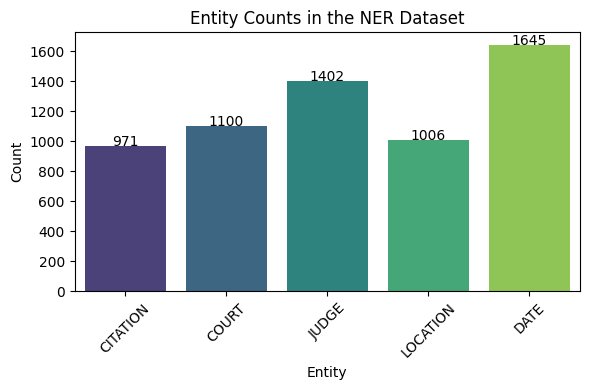

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Create DataFrame
df = pd.DataFrame(data, columns=['Word', 'Tag'])

# Count the entities
entity_counter = Counter()
current_entity = None

for tag in df['Tag']:
    if tag.startswith('B-'):
        current_entity = tag[2:]
        entity_counter[current_entity] += 1
    elif tag.startswith('I-') and current_entity:
        continue
    else:
        current_entity = None

# Convert counter to DataFrame for plotting
entity_counts = pd.DataFrame.from_dict(entity_counter, orient='index', columns=['Count']).reset_index()
entity_counts.rename(columns={'index': 'Entity'}, inplace=True)

# Plot the bar chart using Seaborn
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='Entity', y='Count', data=entity_counts, palette='viridis')
plt.title('Entity Counts in the NER Dataset')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add counts above the bars
for index, row in entity_counts.iterrows():
    barplot.text(index, row['Count'], row['Count'], color='black', ha="center")

# Show the plot
plt.show()


In [15]:
entity_counts


,Entity,Count
0,CITATION,971
1,COURT,1100
2,JUDGE,1402
3,LOCATION,1006
4,DATE,1645


In [15]:
df=pd.read_csv("../data/new_main_text.csv")
df.head()

,paragraph,file_name
0,1. What is the scope of the “presumption in ...,.\data\xml_data\xml_page_1\Barwood Strategic L...
1,"2. The appellant, Barwood Strategic Land II ...",.\data\xml_data\xml_page_1\Barwood Strategic L...
2,3. The site of the proposed development is 6...,.\data\xml_data\xml_page_1\Barwood Strategic L...
3,4. Barwood’s application for planning permis...,.\data\xml_data\xml_page_1\Barwood Strategic L...
4,5. Green J. accepted the council’s argument ...,.\data\xml_data\xml_page_1\Barwood Strategic L...


In [16]:
df.shape

(69881, 2)

In [10]:
df.columns

Index(['paragraph', 'file_name', 'introduction', 'fact', 'citation',
       'judgment', 'Paragraph Number'],
      dtype='object')

C:\Users\deepa\AppData\Local\Temp\ipykernel_7300\1097194645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=count_ones.index, y=count_ones.values, palette="viridis")


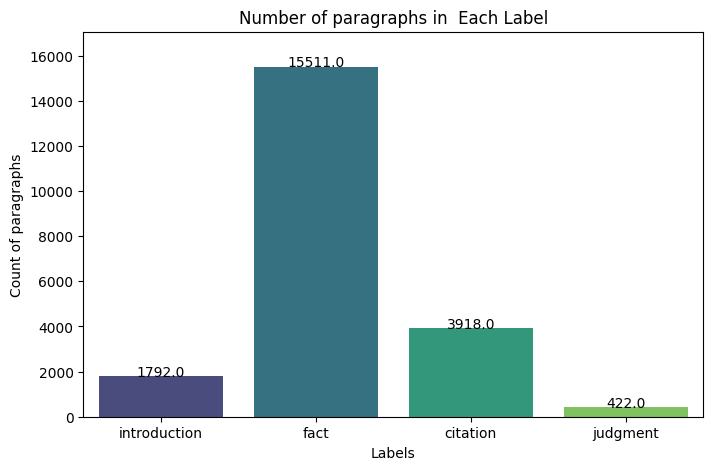

In [14]:

# Count the number of 1s in each of the specified columns
count_ones = df[['introduction', 'fact', 'citation', 'judgment']].sum()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=count_ones.index, y=count_ones.values, palette="viridis")

# Annotate the bar plot with the count on top of each bar
for index, value in enumerate(count_ones.values):
    barplot.text(index, value + 0.05, str(value), color='black', ha="center")

plt.xlabel('Labels')
plt.ylabel('Count of paragraphs')
plt.title('Number of paragraphs in  Each Label')
plt.ylim(0, max(count_ones.values) * 1.1)
plt.show()